In [1]:
# Step 1: Exploring and pre-processing of the dataset for Sentiment Analysis

In [2]:
# Import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import wordcloud
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snaza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snaza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\snaza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\snaza\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\snaza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Load dataset

rest_data = pd.read_csv("Restaurant_Data.csv")

In [4]:
# The first 5 rows of the datase

rest_data.head()

,Restaurant,Reviewer,Review,Rating,Total_Reviews,Total_Followers,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2.0,5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2.0,5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3.0,5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1.0,5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2.0,5/24/2019 21:37,0


In [5]:
# The last 5 rows of the dataset

rest_data.tail()

,Restaurant,Reviewer,Review,Rating,Total_Reviews,Total_Followers,Time,Pictures
1080,Olive Garden,Monika Chunchu,very nice,5.0,1,NaN,07/05/2018 23:25,0
1081,Olive Garden,Abhishek Kumar,gajar halwa was bad,3.0,19,1.0,07/04/2018 19:48,0
1082,Olive Garden,Deepika,sweet was not served with ordered veg executiv...,3.0,3,1.0,07/04/2018 14:08,0
1083,Olive Garden,Sneha Gupta,the dish was extremely oily. the tandoori roti...,2.0,10,119.0,07/02/2018 00:19,0
1084,Olive Garden,RASHMI SINGH,food and packing was good,4.0,2,NaN,07/01/2018 14:22,0


In [6]:
# The number of rows and columns of the dataset

rest_data.shape

(1085, 8)

In [7]:
# The summary of the dataset

rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       1085 non-null   object 
 1   Reviewer         1085 non-null   object 
 2   Review           1082 non-null   object 
 3   Rating           1085 non-null   float64
 4   Total_Reviews    1085 non-null   int64  
 5   Total_Followers  890 non-null    float64
 6   Time             1085 non-null   object 
 7   Pictures         1085 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 67.9+ KB


In [8]:
# The description of the dataset

rest_data.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Total_Reviews,Total_Followers,Time,Pictures
count,1085,1085,1082,1085.000000,1085.000000,890.000000,1085,1085.000000
unique,11,1027,1019,NaN,NaN,NaN,1079,NaN
top,Beyond Flavours,Kiran,good,NaN,NaN,NaN,7/18/2018 14:13,NaN
freq,100,5,36,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,NaN,3.762673,24.253456,190.913483,NaN,0.587097
std,NaN,NaN,NaN,1.458731,55.233564,586.361414,NaN,2.846798
min,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,3.000000,1.000000,2.000000,NaN,0.000000
50%,NaN,NaN,NaN,4.000000,4.000000,10.000000,NaN,0.000000
75%,NaN,NaN,NaN,5.000000,21.000000,97.000000,NaN,0.000000


In [9]:
# Droping the missig value rows of Review Cloumn, as we can not fill them with any specific text.

rest_data.dropna(subset=['Review'], inplace = True)
rest_data.head()

,Restaurant,Reviewer,Review,Rating,Total_Reviews,Total_Followers,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2.0,5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2.0,5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3.0,5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1.0,5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2.0,5/24/2019 21:37,0


In [10]:
# The summary of the dataset again after dropping missing values only from Review Column

rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1084
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       1082 non-null   object 
 1   Reviewer         1082 non-null   object 
 2   Review           1082 non-null   object 
 3   Rating           1082 non-null   float64
 4   Total_Reviews    1082 non-null   int64  
 5   Total_Followers  888 non-null    float64
 6   Time             1082 non-null   object 
 7   Pictures         1082 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 76.1+ KB


In [11]:
# Creating a dataset including resturant name and review

review_data = rest_data.drop(['Reviewer', 'Rating', 'Total_Reviews', 'Total_Followers', 'Time', 'Pictures'], axis=1)
review_data.head()

,Restaurant,Review
0,Beyond Flavours,"The ambience was good, food was quite good . h..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...


In [12]:
# Step 2: Application of Sentiment Analysis

In [13]:
# Apply Sentiment Analyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [14]:
# Check the Polarity score of 'Review'

review_data['Polarity'] = review_data['Review'].apply (lambda x: analyzer.polarity_scores(x))
review_data.head()

,Restaurant,Review,Polarity
0,Beyond Flavours,"The ambience was good, food was quite good . h...","{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'comp..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp..."
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp..."
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp..."
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp..."


In [15]:
# Split the Polarity Score into components and add new cloumns for each component

review_data['Negative'] = review_data['Review'].apply (lambda x: analyzer.polarity_scores(x)['neg'])
review_data['Positive'] = review_data['Review'].apply (lambda x: analyzer.polarity_scores(x)['pos'])
review_data['Neutral'] = review_data['Review'].apply (lambda x: analyzer.polarity_scores(x)['neu'])
review_data['Compound'] = review_data['Review'].apply (lambda x: analyzer.polarity_scores(x)['compound'])
review_data.head()

,Restaurant,Review,Polarity,Negative,Positive,Neutral,Compound
0,Beyond Flavours,"The ambience was good, food was quite good . h...","{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'comp...",0.0,0.418,0.582,0.9664
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...",0.0,0.446,0.554,0.9360
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",0.0,0.308,0.692,0.9186
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.0,0.292,0.708,0.8591
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.0,0.391,0.609,0.9201


In [16]:
# Review the Polarity Score Components in detail

review_data[['Negative', 'Positive', 'Neutral', 'Compound']].describe()

,Negative,Positive,Neutral,Compound
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,0.050428,0.284239,0.664399,0.500924
std,0.119606,0.257718,0.242849,0.536700
min,0.000000,0.000000,0.000000,-0.955700
25%,0.000000,0.094000,0.577750,0.206675
50%,0.000000,0.226500,0.718000,0.717800
75%,0.049750,0.394750,0.820750,0.929700
max,1.000000,1.000000,1.000000,0.998700


<Axes: xlabel='Negative', ylabel='Count'>

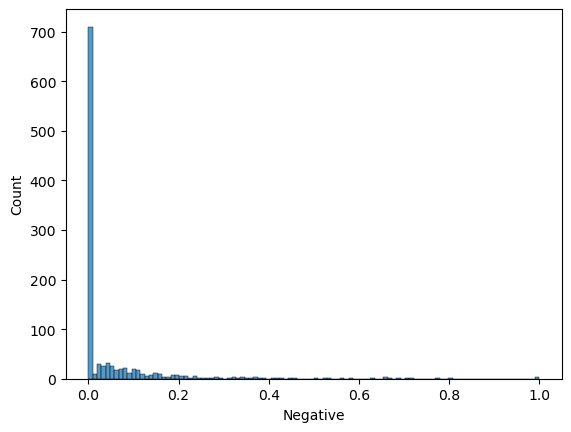

In [17]:
# Draw histogram of Negative component

sns.histplot(review_data['Negative'])

<Axes: xlabel='Positive', ylabel='Count'>

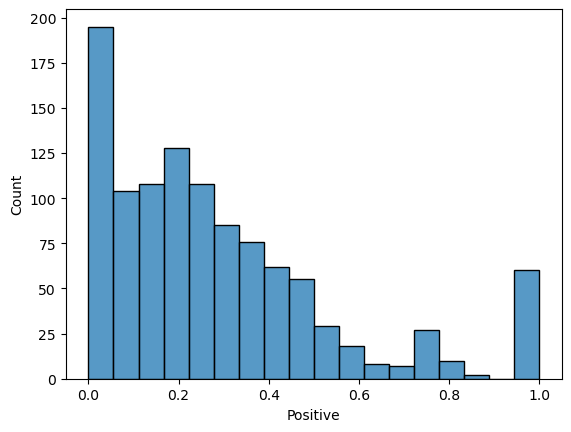

In [18]:
# Draw histogram of Positive component

sns.histplot(review_data['Positive'])

<Axes: xlabel='Neutral', ylabel='Count'>

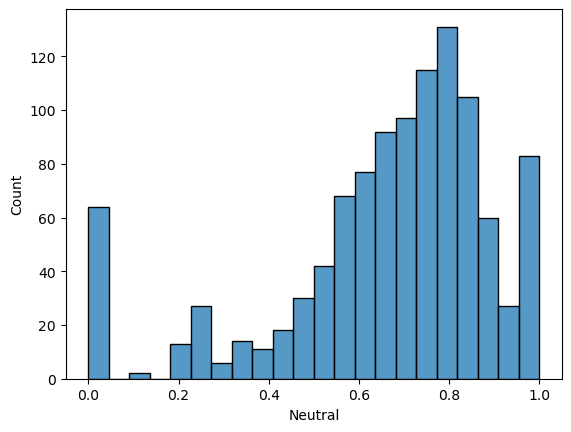

In [19]:
# Draw histogram of Neutral component

sns.histplot(review_data['Neutral'])

<Axes: xlabel='Compound', ylabel='Count'>

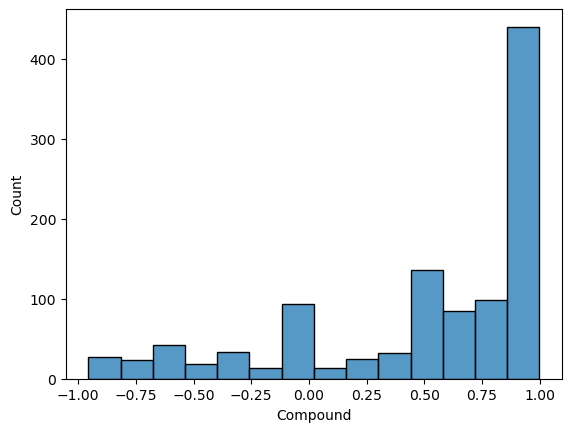

In [20]:
# Draw histogram of Compound component

sns.histplot(review_data['Compound'])

In [21]:
# Check the Neagtive reviews for each resturant

Neg_Reviews = (review_data['Compound']<=0).groupby(review_data['Restaurant']).sum()
Neg_Reviews

Restaurant
Amul               34
Arena Eleven        9
Being Hungry       32
Beyond Flavours    14
Cafe Eclat         16
Desi Bytes         43
Faasos             36
Labonel            11
Olive Garden       13
Paradise            5
Triptify           39
Name: Compound, dtype: int64

In [22]:
# Check the Total reviews for each resturant

Total_Reviews = (review_data['Restaurant'].groupby(review_data['Restaurant']).count())
Total_Reviews

Restaurant
Amul                99
Arena Eleven        85
Being Hungry        99
Beyond Flavours    100
Cafe Eclat         100
Desi Bytes         100
Faasos             100
Labonel            100
Olive Garden        99
Paradise           100
Triptify           100
Name: Restaurant, dtype: int64

In [23]:
# calculate the Neagtive reviews percentage with respect to total reviews

Negative_Percentage = pd.DataFrame((Neg_Reviews / Total_Reviews)*100, 
                            columns = ['Negative_Review_%age']).sort_values(by = 'Negative_Review_%age').round(decimals=2)
Negative_Percentage

,Negative_Review_%age
Restaurant,
Paradise,5.00
Arena Eleven,10.59
Labonel,11.00
Olive Garden,13.13
Beyond Flavours,14.00
Cafe Eclat,16.00
Being Hungry,32.32
Amul,34.34
Faasos,36.00


<Axes: xlabel='Negative_Review_%age', ylabel='Restaurant'>

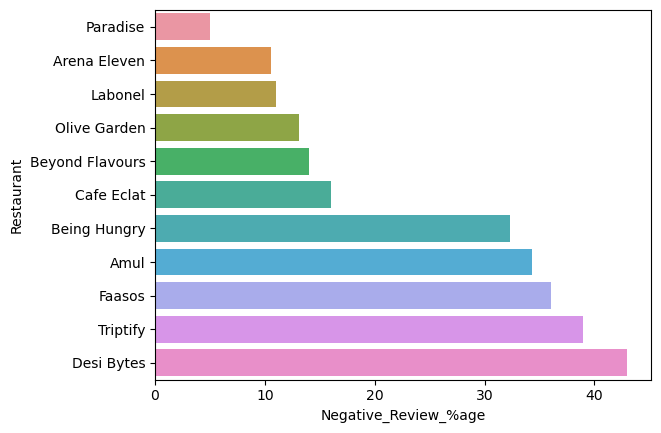

In [24]:
# Visulaise the Neagtive reviews percentage with respect to total reviews

sns.barplot(data=Negative_Percentage, x = 'Negative_Review_%age', y = Negative_Percentage.index)

In [25]:
# Let's look into the most frequent words used in positive and negative reviews of 'Desi Bytes' Resturant

In [26]:
# First, we will aplly preprocessing steps on the 'Review'

# 1. Tokenize the reviews
# 2. Clean Tokens
# 3. Stemming Clean Tokens

# We will define stop_words variable before creating preprocessing function

stop_words = nltk.corpus.stopwords.words('english')

# We will create a combine funtion to apply all preprocessing steps

def preprocessing(text):
    tokenize = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    clean_tokens = [word.lower() for word in tokenize if word.lower() not in stop_words]
    stemming = [nltk.stem.PorterStemmer().stem(word) for word in clean_tokens]
    return stemming

# Let's apply preprocessing to the 'Review' column

review_data['Processed_Review'] = review_data['Review'].apply(preprocessing)
review_data.head()

,Restaurant,Review,Polarity,Negative,Positive,Neutral,Compound,Processed_Review
0,Beyond Flavours,"The ambience was good, food was quite good . h...","{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'comp...",0.0,0.418,0.582,0.9664,"[ambienc, good, food, quit, good, saturday, lu..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...",0.0,0.446,0.554,0.9360,"[ambienc, good, pleasant, even, servic, prompt..."
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",0.0,0.308,0.692,0.9186,"[must, tri, great, food, great, ambienc, thnx,..."
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.0,0.292,0.708,0.8591,"[soumen, da, arun, great, guy, behavior, since..."
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.0,0.391,0.609,0.9201,"[food, good, order, kodi, drumstick, basket, m..."


In [27]:
# Now we will find the most frequent words in negative reviews of 'Desi Bytes'

Negative_Reviews = review_data.loc[(review_data.Restaurant == 'Desi Bytes') & (review_data.Compound<0),:]
Negative_Reviews.head()

,Restaurant,Review,Polarity,Negative,Positive,Neutral,Compound,Processed_Review
785,Desi Bytes,"after reading reviews, i was having high expec...","{'neg': 0.09, 'neu': 0.864, 'pos': 0.046, 'com...",0.090,0.046,0.864,-0.4924,"[read, review, high, expect, place, order, lit..."
787,Desi Bytes,This is the quantity of chicken garlic fried r...,"{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",0.201,0.000,0.799,-0.7595,"[quantiti, chicken, garlic, fri, rice, everyth..."
795,Desi Bytes,Not good and my experience is not at all good ...,"{'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'comp...",0.169,0.000,0.831,-0.6721,"[good, experi, good, litti, chokha, hype, feel..."
806,Desi Bytes,extremely pathetic and third class service. no...,"{'neg': 0.149, 'neu': 0.791, 'pos': 0.06, 'com...",0.149,0.060,0.791,-0.5709,"[extrem, pathet, third, class, servic, cleanli..."
807,Desi Bytes,"Very poor service, we ordered through zomato i...","{'neg': 0.161, 'neu': 0.761, 'pos': 0.078, 'co...",0.161,0.078,0.761,-0.7215,"[poor, servic, order, zomato, restaur, automat..."


In [28]:
# Let's look into the most frequent words in positive reviews of 'Desi Bytes'

Positive_Reviews = review_data.loc[(review_data.Restaurant == 'Desi Bytes') & (review_data.Compound>0),:]
Positive_Reviews.head()

,Restaurant,Review,Polarity,Negative,Positive,Neutral,Compound,Processed_Review
786,Desi Bytes,"The one star is not for food, it's pretty dece...","{'neg': 0.046, 'neu': 0.849, 'pos': 0.105, 'co...",0.046,0.105,0.849,0.7744,"[one, star, food, pretti, decent, visit, frien..."
788,Desi Bytes,Litti chokha lovers missing this delicious dis...,"{'neg': 0.025, 'neu': 0.742, 'pos': 0.234, 'co...",0.025,0.234,0.742,0.9559,"[litti, chokha, lover, miss, delici, dish, hyd..."
789,Desi Bytes,This place is becoming a nice go to place in t...,"{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...",0.000,0.329,0.671,0.9059,"[place, becom, nice, go, place, recent, time, ..."
790,Desi Bytes,Ordered litti chokha seing good reviews. They ...,"{'neg': 0.051, 'neu': 0.829, 'pos': 0.12, 'com...",0.051,0.120,0.829,0.7184,"[order, litti, chokha, se, good, review, sent,..."
791,Desi Bytes,Its an open space eating place famous for thei...,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.000,0.154,0.846,0.8251,"[open, space, eat, place, famou, litti, chokha..."


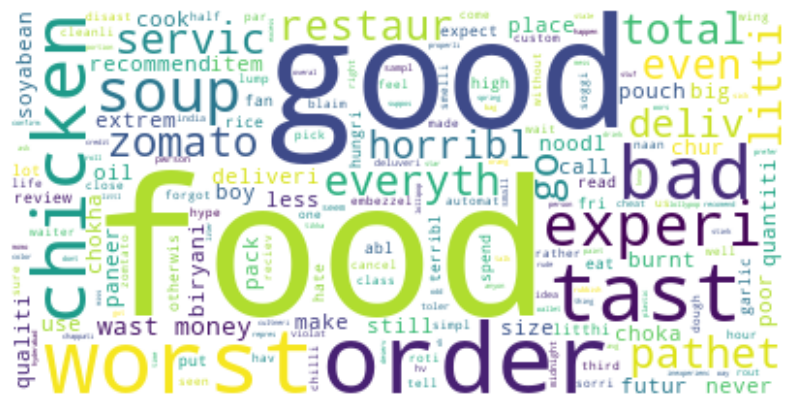

In [29]:
# Wordcloud for Negative Reviews of 'Desi Bytes'

Negative_Words = [word for review in Negative_Reviews['Processed_Review'] for word in review]

Neg_Wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(Negative_Words))

plt.figure(figsize = (10,10))
plt.imshow(Neg_Wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

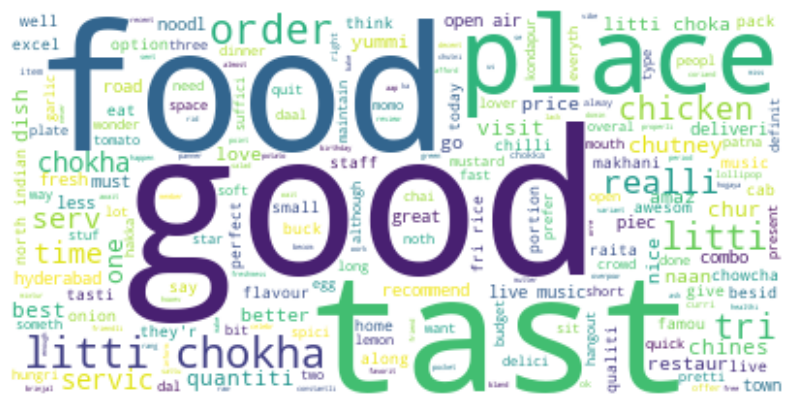

In [30]:
# Wordcloud for Positive Reviews of 'Desi Bytes'

Positive_Words = [word for review in Positive_Reviews['Processed_Review'] for word in review]

Pos_Wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(Positive_Words))

plt.figure(figsize = (10,10))
plt.imshow(Pos_Wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [31]:
# Check the frequency of Negative words in reviews for 'Desi Bytes'

Neg_Freq = FreqDist(Negative_Words)
Neg_Freq.tabulate(12)

   food    good   order   worst    tast     bad chicken  experi    soup everyth   total   litti 
     13       8       7       6       5       4       4       4       4       3       3       3 


In [32]:
# Check the frequency of Positive words in reviews for 'Desi Bytes'

Pos_Freq = FreqDist(Positive_Words)
Pos_Freq.tabulate(12)

  litti    good  chokha    food    tast   place   order     tri  realli       5 chicken    time 
     39      37      28      26      23      21      18      13      12      11      11      10 


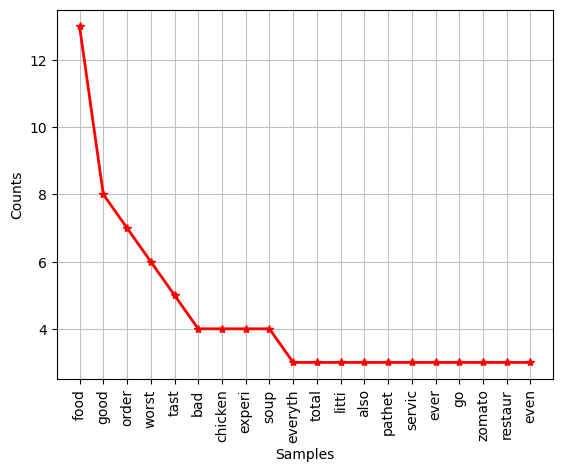

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
# Draw the frequancy distribution plot for Negative Words in reviews for 'Desi Bytes'

Neg_Freq.plot(20, color = 'Red', marker = '*')

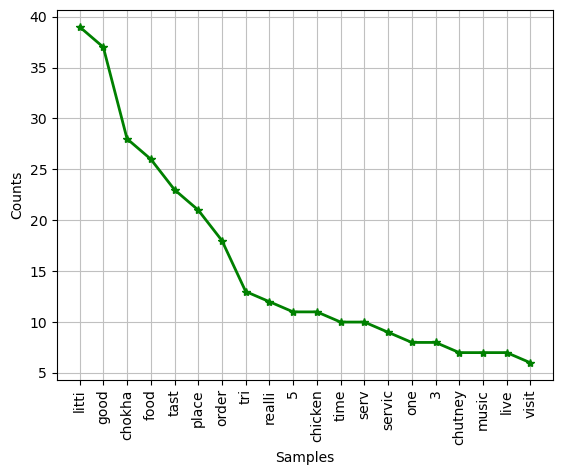

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
# Draw the frequancy distribution plot for Positive Words in reviews for 'Desi Bytes'

Pos_Freq.plot(20, color = 'Green', marker = '*')